# Exercise: Predict Diabetes with a Linear Regression Model

In this exercise, we'll predict a patient's diabetes desease progression from different health indicators such as body mass index, age, blood pressure etc.

## 1. Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**TODO**: Load in the diabetes dataset from scikit learn and get familiar with the dataset. Find out these basic properties:

- How many samples does the dataset have?
- How many features does the dataset have?
- Are there any null values that we have to take care of?
- Has the data been standardized already or do we have to take care of this?
- Does the dataset contain numerical or categorical values or both?

In [2]:
# Load the diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()
list(diabetes)

['data',
 'target',
 'frame',
 'DESCR',
 'feature_names',
 'data_filename',
 'target_filename',
 'data_module']

In [3]:
# Print the description of the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd['target'] = diabetes["target"]

In [5]:
# Take a first look at the data (note that the data has been standardized already)
dfd.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
# Print data types (numerical or categorical) and check if there are any missing values
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
# Generate descriptive statistics (note that the data has been standardized already)
dfd.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


**YOUR ANSWER**:

**TODO**: Plot a histogram in matplotlib to get an overview of the data.

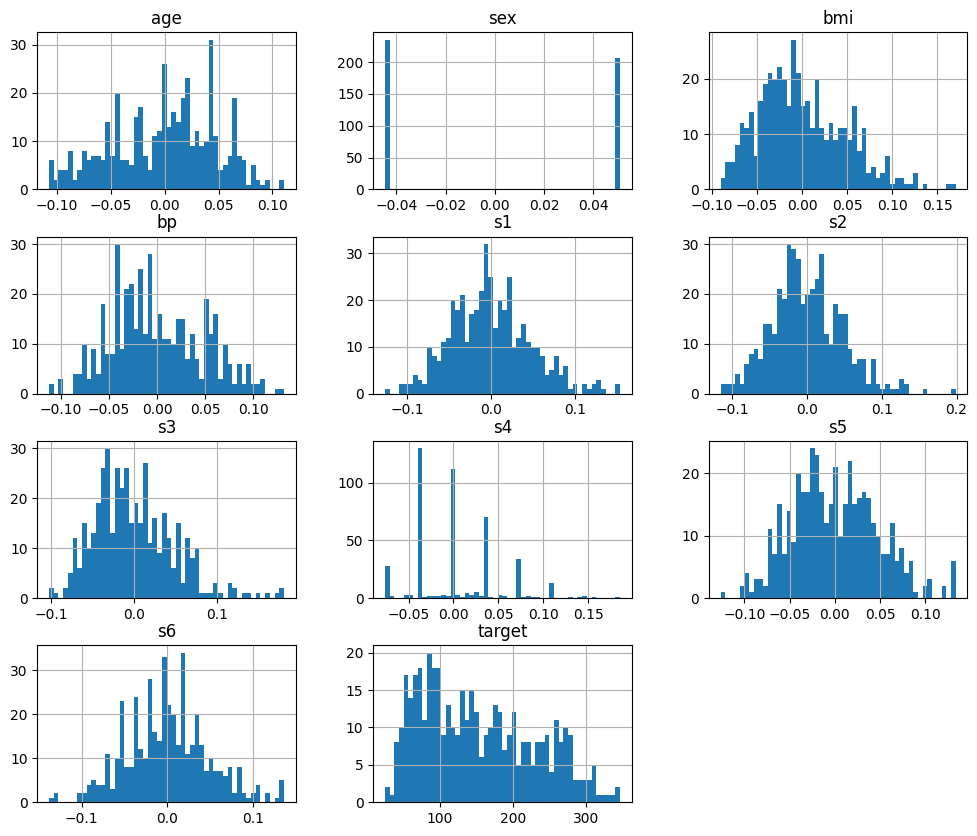

In [8]:
# plot histograms of the features with matplotlib to see their distributions
dfd.hist(bins=50, figsize=(12, 10))
plt.show()

**TODO**: Calculate the linear correlation matrix of the features and the target and plot the results. Which feature is the most important for our prediction goal?

In [9]:
# Calculate the correlation matrix of the features
corr_matrix = dfd.corr()

In [10]:
# Print the correlation matrix sorted by linear correlation with the target
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

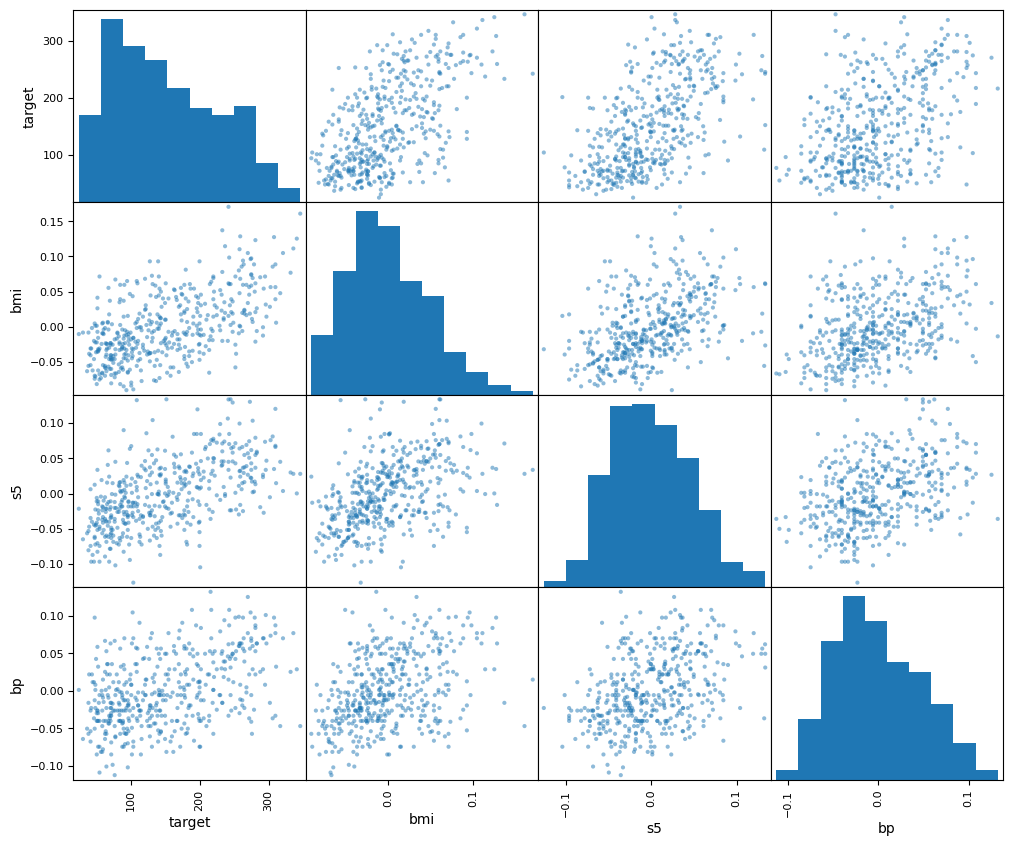

In [11]:
# Plot the most important feature pairs with a scatter plot
from pandas.plotting import scatter_matrix

features = ["target", "bmi", "s5", "bp"]

scatter_matrix(dfd[features], figsize=(12, 10))
plt.show()

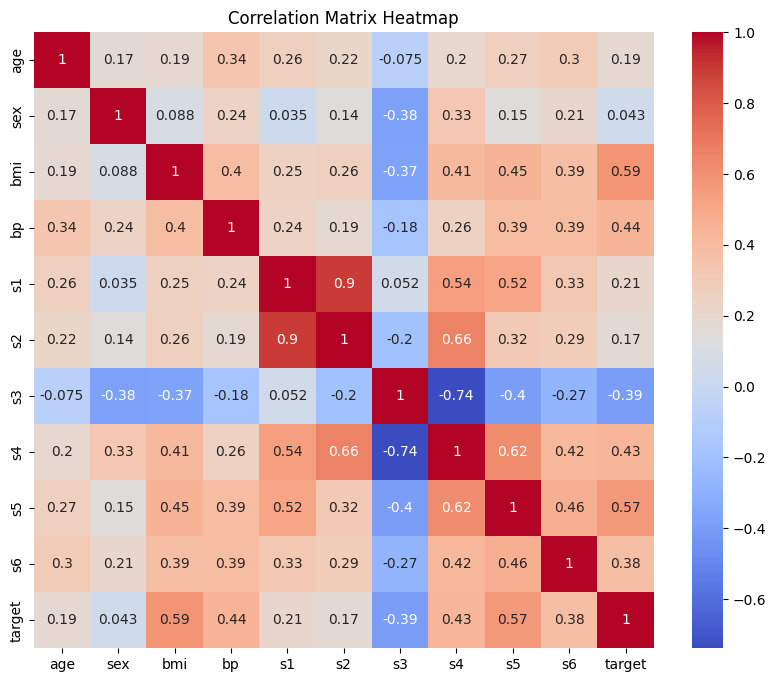

In [12]:
# Plot heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

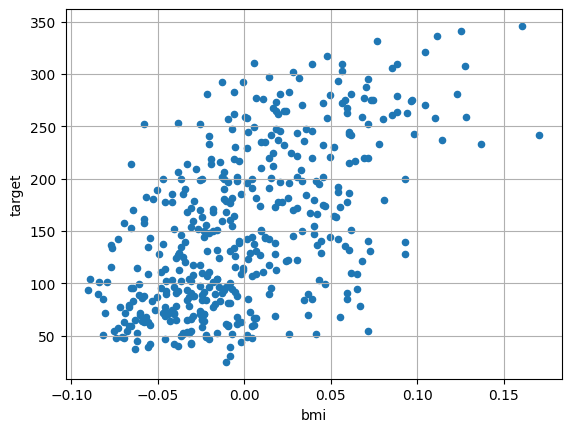

In [13]:
# Choose the most important feature and plot it against the target
dfd.plot(kind="scatter", x="bmi", y="target", grid=True)
plt.show()

**YOUR ANSWER**:

## 2. Training and Evaluation

In [14]:
# Split the data into features and labels
X = dfd.drop("target", axis=1)
y = dfd["target"]

**TODO**: For the diabetes data X and y, create a train and test split with 80% training data and 20% test data.

In [15]:
# Split your data with these ratios: train: 0.8 | test: 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**TODO**: Create and train a LinearRegression model.

In [16]:
# Train a linear regression model on the training set
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

**TODO**: Evaluate the model on the test dataset: make predictions, calculate the RMSE and interpret the plotted regression model - do you think we have found a reasonable model according to the plot?

In [17]:
# Make predictions on the training and test set
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)
print(linear_predictions_test[:10].round(0))

[238. 249. 164. 120. 187. 259. 114. 188. 149. 236.]


In [18]:
# Compare the predictions with the actual values
print(y_test[:10].values)

[321. 215. 127.  64. 175. 275. 179. 232. 142.  99.]


In [19]:
# Calculate the relative error of these predictions
relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in per cent: ", relative_errors[:10].values)

Relative errors in per cent:  [ 25.71043767  15.780521    29.17899669  87.98085665   7.0999053
   5.80092011  36.55984088  18.93205686   5.27832202 138.39149745]


In [20]:
# Calculate the root mean squared error on the training and test set
from sklearn.metrics import root_mean_squared_error
rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
print(rmse_train)
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(rmse_test)

52.2948458174966
58.51717127731562


In [21]:
# Train a simple linear regression model with only one feature for comparison
X_train_bmi = X_train[['bmi']]
X_test_bmi = X_test[['bmi']]
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_bmi, y_train)


LinearRegression()

In [22]:
# Make predictions on the training and test set
simple_predictions_train = simple_linear_model.predict(X_train_bmi)
simple_predictions_test = simple_linear_model.predict(X_test_bmi)

In [23]:
# Calculate the root mean squared error on the training and test set
simple_rmse_train = root_mean_squared_error(y_train, simple_predictions_train)
print(simple_rmse_train)
simple_rmse_test = root_mean_squared_error(y_test, simple_predictions_test)
print(simple_rmse_test)

61.86936801367363
64.42577271038341


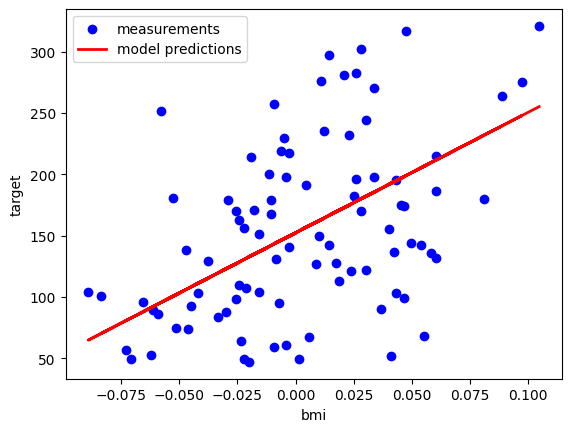

In [24]:
# Plot the simple linear regression model
plt.scatter(X_test_bmi, y_test, color='blue', label='measurements')
plt.plot(X_test_bmi, simple_predictions_test, color='red', linewidth=2, label='model predictions')
plt.xlabel("bmi")
plt.ylabel("target")
plt.legend(loc="upper left")
plt.show()

**YOUR ANSWER**:

-----

## DEMO (not part of the exercise):

## Decision Trees

In [25]:
# Train a more powerful regression model
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
# Calculate the root mean squared error on the training set
tree_predictions_train = tree_model.predict(X_train)
rmse_train = root_mean_squared_error(y_train, tree_predictions_train)
print(rmse_train)

0.0


In [27]:
# Compare to the root mean squared error on the test set
tree_predictions_test = tree_model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, tree_predictions_test)
print(rmse_test)

83.0168522217567


In [28]:
# Train a simple tree regression model with only one feature for comparison
simple_tree_model = DecisionTreeRegressor(random_state=0)
simple_tree_model.fit(X_train_bmi, y_train)


DecisionTreeRegressor(random_state=0)

In [29]:
# Make predictions on the training and test set
simple_predictions_train = simple_tree_model.predict(X_train_bmi)
simple_predictions_test = simple_tree_model.predict(X_test_bmi)

In [30]:
# Calculate the root mean squared error on the training and test set
simple_rmse_train = root_mean_squared_error(y_train, simple_predictions_train)
print(simple_rmse_train)
simple_rmse_test = root_mean_squared_error(y_test, simple_predictions_test)
print(simple_rmse_test)

45.99487310797884
81.71279250399841


[Text(0.5449359262589928, 0.9615384615384616, 'x[0] <= 0.005\nsquared_error = 6130.698\nsamples = 353\nvalue = 151.606'),
 Text(0.3300921762589928, 0.8846153846153846, 'x[0] <= -0.022\nsquared_error = 3630.742\nsamples = 218\nvalue = 117.124'),
 Text(0.4375140512589928, 0.9230769230769231, 'True  '),
 Text(0.22385341726618704, 0.8076923076923077, 'x[0] <= -0.039\nsquared_error = 2469.829\nsamples = 139\nvalue = 104.252'),
 Text(0.12612410071942445, 0.7307692307692307, 'x[0] <= -0.066\nsquared_error = 1885.665\nsamples = 78\nvalue = 96.769'),
 Text(0.0856115107913669, 0.6538461538461539, 'x[0] <= -0.069\nsquared_error = 1063.079\nsamples = 21\nvalue = 86.333'),
 Text(0.050359712230215826, 0.5769230769230769, 'x[0] <= -0.08\nsquared_error = 1234.184\nsamples = 16\nvalue = 91.938'),
 Text(0.02302158273381295, 0.5, 'x[0] <= -0.083\nsquared_error = 242.64\nsamples = 5\nvalue = 78.4'),
 Text(0.011510791366906475, 0.4230769230769231, 'x[0] <= -0.088\nsquared_error = 4.0\nsamples = 2\nvalue = 

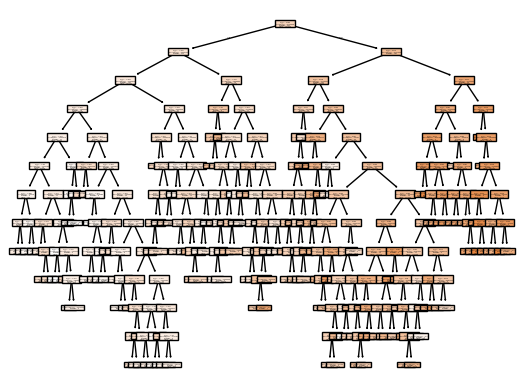

In [31]:
# Plot the simple tree regression model
from sklearn.tree import plot_tree
plot_tree(simple_tree_model, filled=True)

c:\Users\muntzinger\Documents\Arbeit_HFT\9_Sonstiges\Udacity\Udacity_Instructor_DSND\Exercises\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


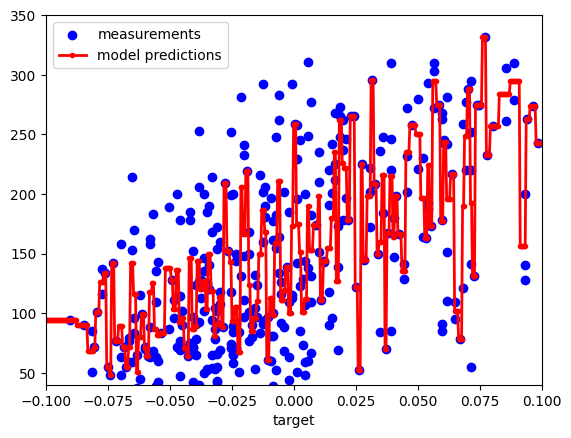

In [32]:
# Plot the simple linear regression model
plt.scatter(X_train_bmi, y_train, color='blue', label='measurements')
axes = [-0.1, 0.1, 40, 350]
xs = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
ys = simple_tree_model.predict(xs)
plt.axis(axes)
plt.xlabel("bmi")
plt.xlabel("target")
plt.plot(xs, ys, "r.-", linewidth=2, label='model predictions')
plt.legend(loc="upper left")
plt.show()

In [33]:
# Train a simple tree regression model with only one feature for comparison
regularized_tree_model = DecisionTreeRegressor(random_state=0, max_depth=2)
regularized_tree_model.fit(X_train_bmi, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [34]:
# Make predictions on the training and test set
simple_predictions_train = regularized_tree_model.predict(X_train_bmi)
simple_predictions_test = regularized_tree_model.predict(X_test_bmi)

In [35]:
# Calculate the root mean squared error on the training and test set
simple_rmse_train = root_mean_squared_error(y_train, simple_predictions_train)
print(simple_rmse_train)
simple_rmse_test = root_mean_squared_error(y_test, simple_predictions_test)
print(simple_rmse_test)

61.057157824056254
63.5104687729349


[Text(0.5, 0.8333333333333334, 'x[0] <= 0.005\nsquared_error = 6130.698\nsamples = 353\nvalue = 151.606'),
 Text(0.25, 0.5, 'x[0] <= -0.022\nsquared_error = 3630.742\nsamples = 218\nvalue = 117.124'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 2469.829\nsamples = 139\nvalue = 104.252'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4868.885\nsamples = 79\nvalue = 139.772'),
 Text(0.75, 0.5, 'x[0] <= 0.073\nsquared_error = 5147.035\nsamples = 135\nvalue = 207.289'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4745.091\nsamples = 109\nvalue = 193.55'),
 Text(0.875, 0.16666666666666666, 'squared_error = 2723.564\nsamples = 26\nvalue = 264.885')]

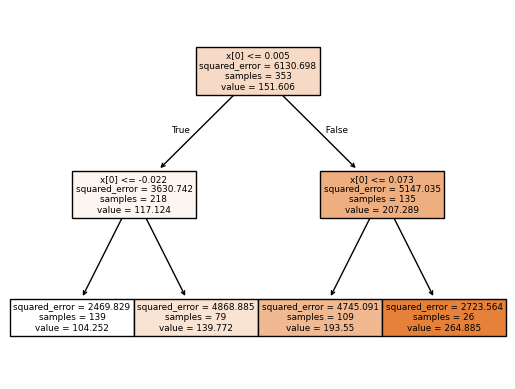

In [36]:
# Plot the simple tree regression model
plot_tree(regularized_tree_model, filled=True)

c:\Users\muntzinger\Documents\Arbeit_HFT\9_Sonstiges\Udacity\Udacity_Instructor_DSND\Exercises\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


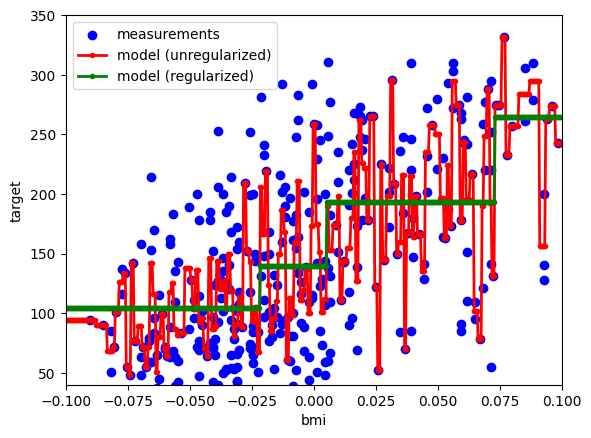

In [37]:
# Plot the simple tree regression model
plt.scatter(X_train_bmi, y_train, color='blue', label='measurements')
ys_reg = regularized_tree_model.predict(xs)
plt.axis(axes)
plt.xlabel("bmi")
plt.ylabel("target")
plt.plot(xs, ys, "r.-", linewidth=2, label='model (unregularized)')
plt.plot(xs, ys_reg, "g.-", linewidth=2, label='model (regularized)')
plt.legend(loc="upper left")
plt.show()